### 0. web crawling
- 1. requests : json : 동적페이지 (url의 변경 없이 데이터를 수정 및 추가)
    - 더보기 눌렀는데 url변경 없이 웹페이지 데이터가 늘어나는 것
- 2. requests : html : 정적페이지 (url 변경으로 데이터를 수정 및 추가)
- 3. selenium : web browser : 1, 2번 방법을 사용하지 못할 때 사용
    - 속도가 느림.
    - 대부분 성공.

### 1. 네이버 주식 데이터 크롤링
- 코스피 데이터 수집
- 코스닥 데이터 수집
- USD 환율 데이터 수집
- 그래프, 상관계수 확인

### 2. 크롤링 절차
- 1. 웹 서비스 분석 : URL 확인
    - 구성이 simple한 모바일 페이지로 접속
- 2. request, response : json 데이터(문자열)를 얻기
- 3. json 데이터 (문자열) -> dict로 파싱 -> 데이터 프레임

- F12 -> 개발자 도구 -> Network -> XHR 탭
    - https://m.stock.naver.com/sise/siseIndex.nhn?code=KOSPI 에서 하단 더보기를 눌렀을 때, 증가되는 kospi 데이터가 어떤 포맷으로 되어있는지 확인 가능
    - XHR은 json데이터만 띄움
    - hearders 탭
        - request url, request method, request status, user-agent 확인
    - Response 탭
        - 실제로 받아오는 데이터 (문자열)

In [2]:
import requests

In [3]:
# 1. 웹서비스 분석 : URL 찾기
code, page_size, page = 'KOSPI', '20','1'

# request url 사용
url = 'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}'.format(code, page_size, page)
print(url)

https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1


In [4]:
# 2. request, response : json 포맷의 데이터를 문자열로 가져오기
response = requests.get(url)
response  # status 양호

<Response [200]>

In [5]:
# 3. JSON(str) -> JSON(dict) -> DataFrame
print(type(response.text))
print('------------------------')
print('text속성에 담긴 것은 string형태의 json')
response.text[:200]

<class 'str'>
------------------------
text속성에 담긴 것은 string형태의 json


'{"result":{"siseList":[{"cd":"KOSPI","dt":"20210112","ncv":3125.95,"cv":-22.5,"cr":-0.71,"ov":3145.87,"hv":3154.79,"lv":3047.56},{"cd":"KOSPI","dt":"20210111","ncv":3148.45,"cv":-3.73,"cr":-0.12,"ov":'

In [6]:
# json() 메서드로 dict형태로 파싱
datas = response.json()['result']['siseList']
datas

[{'cd': 'KOSPI',
  'dt': '20210112',
  'ncv': 3125.95,
  'cv': -22.5,
  'cr': -0.71,
  'ov': 3145.87,
  'hv': 3154.79,
  'lv': 3047.56},
 {'cd': 'KOSPI',
  'dt': '20210111',
  'ncv': 3148.45,
  'cv': -3.73,
  'cr': -0.12,
  'ov': 3161.9,
  'hv': 3266.23,
  'lv': 3096.19},
 {'cd': 'KOSPI',
  'dt': '20210108',
  'ncv': 3152.18,
  'cv': 120.5,
  'cr': 3.97,
  'ov': 3040.11,
  'hv': 3161.11,
  'lv': 3040.11},
 {'cd': 'KOSPI',
  'dt': '20210107',
  'ncv': 3031.68,
  'cv': 63.47,
  'cr': 2.14,
  'ov': 2980.75,
  'hv': 3055.28,
  'lv': 2980.75},
 {'cd': 'KOSPI',
  'dt': '20210106',
  'ncv': 2968.21,
  'cv': -22.36,
  'cr': -0.75,
  'ov': 2993.34,
  'hv': 3027.16,
  'lv': 2961.37},
 {'cd': 'KOSPI',
  'dt': '20210105',
  'ncv': 2990.57,
  'cv': 46.12,
  'cr': 1.57,
  'ov': 2943.67,
  'hv': 2990.57,
  'lv': 2921.84},
 {'cd': 'KOSPI',
  'dt': '20210104',
  'ncv': 2944.45,
  'cv': 70.98,
  'cr': 2.47,
  'ov': 2874.5,
  'hv': 2946.54,
  'lv': 2869.11},
 {'cd': 'KOSPI',
  'dt': '20201230',
  'ncv': 

In [7]:
# dict형태의 데이터를 key로 접근하여 추출 후, DF로 변환
kospi_df = pd.DataFrame(datas)
kospi_df.tail()

,cd,dt,ncv,cv,cr,ov,hv,lv
15,KOSPI,20201217,2770.43,-1.36,-0.05,2769.89,2772.71,2742.25
16,KOSPI,20201216,2771.79,14.97,0.54,2763.64,2781.08,2761.50
17,KOSPI,20201215,2756.82,-5.38,-0.19,2763.65,2769.37,2735.08
18,KOSPI,20201214,2762.20,-7.86,-0.28,2769.43,2782.79,2755.29
19,KOSPI,20201211,2770.06,23.60,0.86,2754.16,2781.04,2754.16


---------------

In [8]:
# 함수로 만들기
def get_stock_data(code, pagesize=20, page=1):
    url = 'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}'.format(code, pagesize, page)
    response = requests.get(url)
    datas = response.json()['result']['siseList']
    return pd.DataFrame(datas)

In [9]:
kosdaq_df = get_stock_data('KOSDAQ', pagesize=100)
kosdaq_df.tail()

,cd,dt,ncv,cv,cr,ov,hv,lv
95,KOSDAQ,20200821,796.01,4.87,0.62,801.14,802.70,781.41
96,KOSDAQ,20200820,791.14,-27.60,-3.37,816.63,821.11,785.00
97,KOSDAQ,20200819,818.74,18.52,2.31,810.86,818.74,805.52
98,KOSDAQ,20200818,800.22,-34.81,-4.17,834.55,834.55,794.91
99,KOSDAQ,20200814,835.03,-19.74,-2.31,854.71,854.71,831.15


In [10]:
kospi_df = get_stock_data("KOSPI", 100)
kosdaq_df = get_stock_data("KOSDAQ", 100)

In [12]:
len(kospi_df), len(kosdaq_df)

(100, 100)

----------

### USD 수집

In [13]:
# 1. 웹페이지 분석 : URL
code, pagesize, page = 'FX_USDKRW', 100, 1

url = 'https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?\
marketIndexCd={}&pageSize={}&page={}'.format(code, pagesize, page)

print(url)

https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd=FX_USDKRW&pageSize=100&page=1


In [14]:
# 2. request, response, json(str)
response = requests.get(url)
print(response)
response.text[:200]

<Response [200]>


'{"result":{"errorMessage":"로그인이 필요한 서비스 입니다.\\n로그인 하시겠습니까?","errorCode":"authenticationFail"},"resultCode":"error"}'

- 로그인이 필요한 서비스입니다??

- 쿠키데이터 (로그인 정보)를 추가해서 요청해야 함
    - request headers에 쿠키데이터 정보 있음.

In [15]:
# 2-1. request with cookie

params = {
'cookie':'NNB=BQIZWUVEQM7V6; _fbp=fb.1.1598002288784.1358710430; NRTK=ag#20s_gr#0_ma#-1_si#1_en#-1_sp#1; ASID=709b210600000174106c7c000000004d; NID_AUT=n+AFjQZ4XTbSrtMx/peuEwUsQDhFemNI8HwVMi14eUHjwMQBMVKvkuxMqYr7WmoB; NID_JKL=u0nhcgoHyHEIFGVTrJDUCULHlGGM/1xK1hoQH3cKo+4=; nx_ssl=2; _ga_4BKHBFKFK0=GS1.1.1608644424.10.1.1608644432.52; NDARK=Y; _ga=GA1.1.345787151.1598002289; _ga_7VKFYR6RV1=GS1.1.1610250132.1.1.1610250868.60; NID_SES=AAABk0lHqjbKXXSJVLH1sFcPsykudoTyx/CU9CRfGDX4msWUr+gctUW5/NdjGWgNoC7cdN5vfUQ+6+mSF3cDOSxgpVt77+xK1hvVu7jw7lLGIcMYc1G52RjM35TRAgzIusLIVXdjICCIg+7q/WWJ8LfKsskWImlQmon7mDb5b8NHGsNAOVEqer5QMvzFCR4NO7geb11+V3YLm9i4xaoJ5mSAVrqZGw++yJldZN3zf9StsD8Psx8moDWW6iR0Vqup5TuTkddXcVlNVqCM0MN3/zuGgfquOVt7XG9L9BQW/kAIrFzlEZTJXY7DNBP43Y0bWJRV192zcAB/q/fSbcexmxVLhhUlLsKW1AGTRk5yDHrXEN3KcPFEWYaLszSX1e/PLJh3qS5uwUWWirUodTUFrEFNRM+axYikqDmKA18B/uzhgoyQNLPLzDJihmAtR8jCp281qsIoKgAPXMsA4F3ByjTFyNWr3CMK/B3NK/f8qAcse6nXJf6mmH1fdbTnH8cRlhV2bMa/HZegVLK8D/lP5mXW/r3r5hiNpfAmm7OlK/DjQZ0g; page_uid=U/1Ybwp0JXossPh8RR8ssssstpR-196879; naver_mobile_stock_codeList=048530%7C; JSESSIONID=234AD65644EB62DE7C9EF0AB8A0F56B7; BMR=; XSRF-TOKEN=290e93d1-7596-4f6d-8ac7-91f91aee953d'
}

response = requests.get(url, headers=params)
print(response)
response.text[:300]

<Response [200]>


'{"result":{"marketIndexDay":[{"dt":"20210112","nv":1099.0,"cv":1.0,"cr":0.09,"cbv":1118.23,"csv":1079.77,"sv":1109.7,"rv":1088.3},{"dt":"20210111","nv":1098.0,"cv":6.0,"cr":0.55,"cbv":1117.21,"csv":1078.79,"sv":1108.7,"rv":1087.3},{"dt":"20210108","nv":1092.0,"cv":0.0,"cr":0.0,"cbv":1111.11,"csv":10'

In [16]:
# 3. json(str) -> json(dict) -> DF
datas = response.json()['result']['marketIndexDay']
usd_df = pd.DataFrame(datas)
usd_df.tail()

,dt,nv,cv,cr,cbv,csv,sv,rv
95,20200824,1188.0,-1.5,-0.13,1208.79,1167.21,1199.6,1176.4
96,20200821,1189.5,1.0,0.08,1210.31,1168.69,1201.1,1177.9
97,20200820,1188.5,10.5,0.89,1209.29,1167.71,1200.1,1176.9
98,20200819,1178.0,-6.5,-0.55,1198.61,1157.39,1189.5,1166.5
99,20200818,1184.5,-3.0,-0.25,1205.22,1163.78,1196.1,1172.9


In [17]:
print(usd_df['dt'].values)

['20210112' '20210111' '20210108' '20210107' '20210106' '20210105'
 '20210104' '20201231' '20201230' '20201229' '20201228' '20201224'
 '20201223' '20201222' '20201221' '20201218' '20201217' '20201216'
 '20201215' '20201214' '20201211' '20201210' '20201209' '20201208'
 '20201207' '20201204' '20201203' '20201202' '20201201' '20201130'
 '20201127' '20201126' '20201125' '20201124' '20201123' '20201120'
 '20201119' '20201118' '20201117' '20201116' '20201113' '20201112'
 '20201111' '20201110' '20201109' '20201106' '20201105' '20201104'
 '20201103' '20201102' '20201030' '20201029' '20201028' '20201027'
 '20201026' '20201023' '20201022' '20201021' '20201020' '20201019'
 '20201016' '20201015' '20201014' '20201013' '20201012' '20201008'
 '20201007' '20201006' '20201005' '20200929' '20200928' '20200925'
 '20200924' '20200923' '20200922' '20200921' '20200918' '20200917'
 '20200916' '20200915' '20200914' '20200911' '20200910' '20200909'
 '20200908' '20200907' '20200904' '20200903' '20200902' '20200

In [18]:
print(kospi_df['dt'].values)

['20210112' '20210111' '20210108' '20210107' '20210106' '20210105'
 '20210104' '20201230' '20201229' '20201228' '20201224' '20201223'
 '20201222' '20201221' '20201218' '20201217' '20201216' '20201215'
 '20201214' '20201211' '20201210' '20201209' '20201208' '20201207'
 '20201204' '20201203' '20201202' '20201201' '20201130' '20201127'
 '20201126' '20201125' '20201124' '20201123' '20201120' '20201119'
 '20201118' '20201117' '20201116' '20201113' '20201112' '20201111'
 '20201110' '20201109' '20201106' '20201105' '20201104' '20201103'
 '20201102' '20201030' '20201029' '20201028' '20201027' '20201026'
 '20201023' '20201022' '20201021' '20201020' '20201019' '20201016'
 '20201015' '20201014' '20201013' '20201012' '20201008' '20201007'
 '20201006' '20201005' '20200929' '20200928' '20200925' '20200924'
 '20200923' '20200922' '20200921' '20200918' '20200917' '20200916'
 '20200915' '20200914' '20200911' '20200910' '20200909' '20200908'
 '20200907' '20200904' '20200903' '20200902' '20200901' '20200

In [27]:
filters= (kospi_df['dt'] != kosdaq_df['dt'])
kospi_df[filters]

,cd,dt,ncv,cv,cr,ov,hv,lv


In [30]:
filters2= (kospi_df['dt'] != usd_df['dt'])
kospi_df[filters2]

,cd,dt,ncv,cv,cr,ov,hv,lv
7,KOSPI,20201230,2873.47,52.96,1.88,2820.36,2878.21,2809.35
8,KOSPI,20201229,2820.51,11.91,0.42,2810.55,2823.44,2792.06
9,KOSPI,20201228,2808.60,1.74,0.06,2820.95,2834.59,2799.56
10,KOSPI,20201224,2806.86,47.04,1.70,2762.60,2812.16,2762.60
11,KOSPI,20201223,2759.82,26.14,0.96,2737.74,2769.08,2716.28
...,...,...,...,...,...,...,...,...
95,KOSPI,20200821,2304.59,30.37,1.34,2306.16,2329.34,2280.97
96,KOSPI,20200820,2274.22,-86.32,-3.66,2339.91,2357.08,2270.85
97,KOSPI,20200819,2360.54,12.30,0.52,2370.87,2380.10,2353.17
98,KOSPI,20200818,2348.24,-59.25,-2.46,2405.84,2419.65,2336.78


------------------

In [19]:
# merge로 데이터 합치기

In [20]:
merge_df_1 = pd.merge(kospi_df, kosdaq_df, left_on = 'dt', right_on='dt')
merge_df_1 = merge_df_1.rename(columns={'ncv_x':'ncv_kospi', 'ncv_y':'ncv_kosdaq'})
merge_df_1 = merge_df_1[['dt','ncv_kospi','ncv_kosdaq']]
merge_df_1.tail(2)

,dt,ncv_kospi,ncv_kosdaq
98,20200818,2348.24,800.22
99,20200814,2407.49,835.03


In [22]:
merge_df = pd.merge(merge_df_1, usd_df)[['dt','ncv_kospi','ncv_kosdaq', 'nv']]
merge_df.tail()

,dt,ncv_kospi,ncv_kosdaq,nv
94,20200824,2329.83,815.74,1188.0
95,20200821,2304.59,796.01,1189.5
96,20200820,2274.22,791.14,1188.5
97,20200819,2360.54,818.74,1178.0
98,20200818,2348.24,800.22,1184.5


---------------------

### 그래프 그리기

In [71]:
ls = range(99)
list(ls[::9])

[0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90]

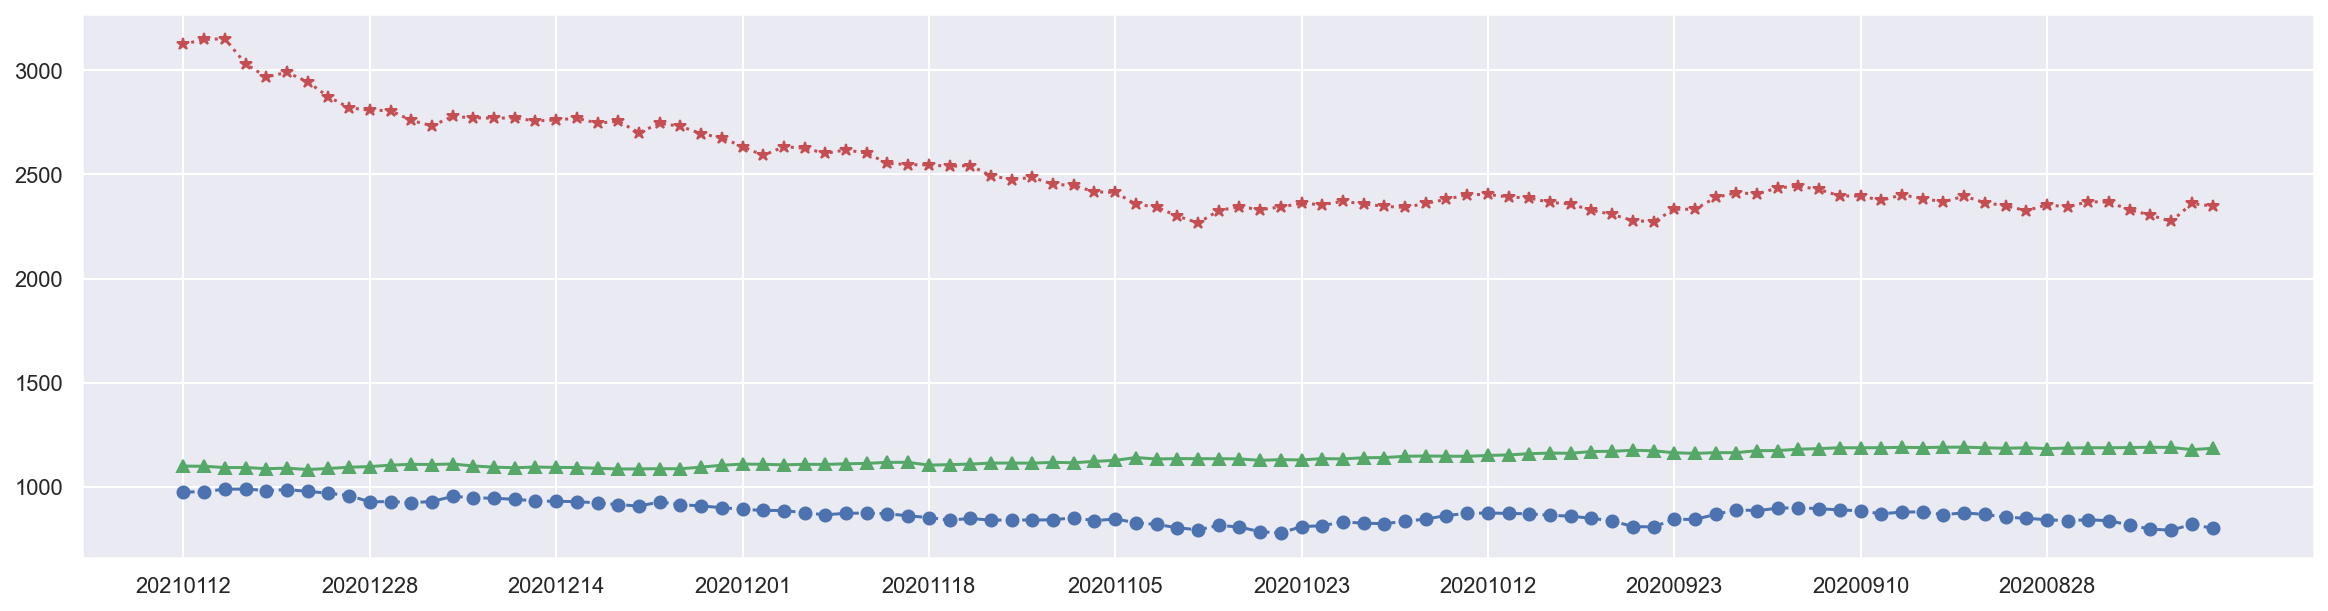

In [70]:
plt.figure(figsize=(20,5))
plt.plot(merge_df['dt'], merge_df['ncv_kospi'], 'r*:', label='kospi')
plt.plot(merge_df['dt'], merge_df['ncv_kosdaq'], 'bo--', label='kosdaq')
plt.plot(merge_df['dt'], merge_df['nv'], 'g^-', label='usd')

step = len(merge_df) // 10
plt.xticks(merge_df[::step]['dt'])

plt.show()

### 정규화

In [85]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale

In [87]:
minmax_scale(merge_df['ncv_kospi'])

array([0.97036259, 0.99578545, 1.        , 0.86384642, 0.79213134,
       0.81739602, 0.76528479, 0.68508412, 0.62524434, 0.61178717,
       0.60982114, 0.5566704 , 0.52713467, 0.57794651, 0.57063602,
       0.56865869, 0.57019536, 0.55328068, 0.55935957, 0.56824062,
       0.54157486, 0.55175531, 0.49013028, 0.54042236, 0.52461498,
       0.48480842, 0.46184875, 0.4147882 , 0.36630397, 0.41388428,
       0.40536479, 0.377829  , 0.39615606, 0.3790154 , 0.32354835,
       0.31667853, 0.3146673 , 0.30733421, 0.31171825, 0.25617211,
       0.23555134, 0.24713287, 0.2098008 , 0.20343943, 0.16875134,
       0.1656893 , 0.10188355, 0.08605358, 0.03729817, 0.        ,
       0.06725196, 0.0882569 , 0.07196366, 0.08673152, 0.10582692,
       0.09931867, 0.11718247, 0.10311515, 0.08992915, 0.08404235,
       0.10627888, 0.12805216, 0.15366711, 0.15432245, 0.14102347,
       0.13535134, 0.11157814, 0.10265189, 0.06863044, 0.04624702,
       0.0131521 , 0.00627097, 0.07467543, 0.073941  , 0.13811

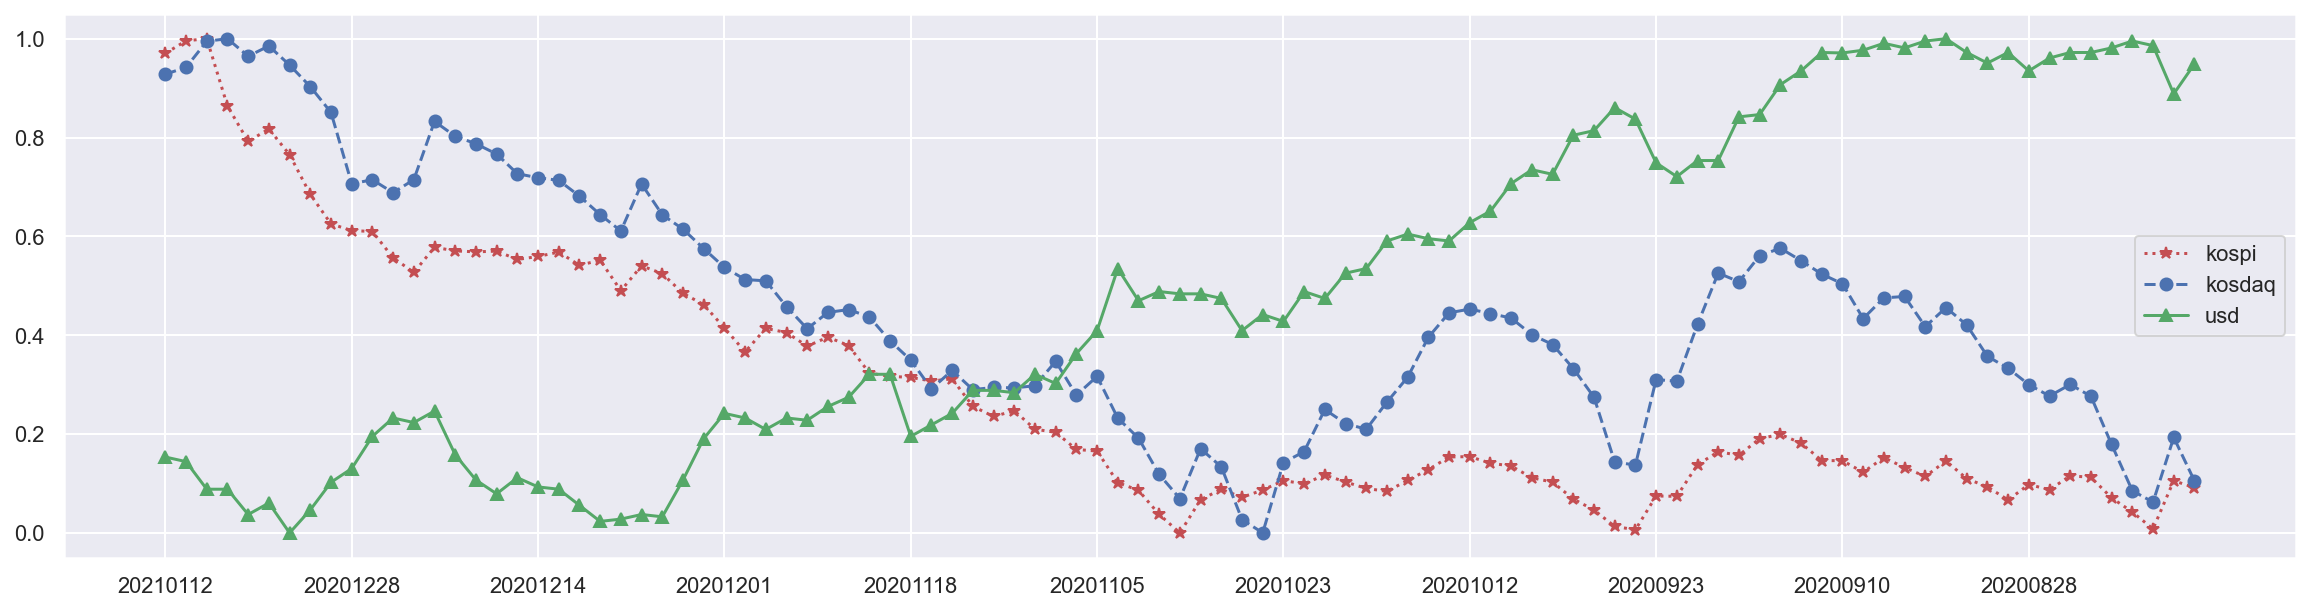

In [88]:
plt.figure(figsize=(20,5))
plt.plot(merge_df['dt'], minmax_scale(merge_df['ncv_kospi']), 'r*:', label='kospi')
plt.plot(merge_df['dt'], minmax_scale(merge_df['ncv_kosdaq']), 'bo--', label='kosdaq')
plt.plot(merge_df['dt'], minmax_scale(merge_df['nv']), 'g^-', label='usd')

plt.legend()

step = len(merge_df) // 10
plt.xticks(merge_df[::step]['dt'])

plt.show()

### 상관계수

In [90]:
# kospi와 kosdaq
np.corrcoef(merge_df['ncv_kospi'], merge_df['ncv_kosdaq'])[0,1]

0.9015038575914553

In [91]:
# kospi와 usd
np.corrcoef(merge_df['ncv_kospi'], merge_df['nv'])[0,1]

-0.7812923500155786

In [92]:
# kosdaq와 usd
np.corrcoef(merge_df['ncv_kosdaq'], merge_df['nv'])[0,1]

-0.5640775305367268